In [1]:
# Imports
from sklearn import tree
import sklearn as sk
import pandas as pd
import numpy as np

In [2]:
# 1) Load .xlsx file
data = pd.read_excel("differential_expression_concat.xlsx").set_index("Unnamed: 0")
# 2) Load metadata info
metadata = pd.read_csv(open("metadata.tsv", "r"), delimiter="\t").set_index("Sample")

data

,GSM260887,GSM260890,GSM260892,GSM260895,GSM260898,GSM260901,GSM260904,GSM260907,GSM260910,GSM260915,...,GSM2159874_GSM2186713,GSM2159875_GSM2186714,GSM2159876_GSM2186715,GSM2159877_GSM2186716,GSM2159878_GSM2186717,GSM2159879_GSM2186718,GSM2159880_GSM2186719,GSM2159881_GSM2186720,GSM2159882_GSM2186721,GSM2159883_GSM2186722
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
A1CF,5.890420,6.228850,6.869206,6.299806,5.557719,5.656761,5.895155,6.396741,6.310707,5.884358,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A2M,4.867974,5.043180,5.487881,5.334602,4.807455,4.843335,4.967597,4.913985,5.171552,4.845964,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A4GALT,6.339964,6.559657,6.928536,6.436581,5.969749,5.835060,5.806382,5.876291,6.432027,6.252952,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A4GNT,6.440146,6.656898,6.875618,6.728823,6.396184,6.431242,6.610005,6.672871,6.605194,6.608800,...,4.676973,5.161621,5.069225,5.867330,4.671348,4.877101,4.702469,5.162750,5.011680,4.847757
AAAS,7.456183,7.738954,7.918536,7.995426,7.131246,6.818395,7.242989,7.320810,7.807785,7.675744,...,6.239567,6.139769,6.297346,5.242984,6.101486,5.983873,5.614917,6.166369,5.678017,6.472259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZXDB,5.092741,5.383403,5.334545,5.084221,5.078895,5.157039,5.205596,5.236322,5.084414,5.039015,...,6.326876,4.871969,5.529382,5.776398,5.829521,6.625318,6.344905,6.818616,6.217116,5.914615
ZXDC,7.895829,7.627829,7.018347,7.375847,8.238326,8.458064,7.630709,7.715188,7.934763,7.740201,...,6.579478,6.903806,6.704035,6.123917,6.645395,6.257242,6.710593,6.748697,6.597415,6.092526
ZYX,7.004850,7.322717,7.906336,8.073288,6.726512,6.449532,6.702146,7.016427,7.966698,6.995969,...,10.848133,11.308139,10.728937,10.344253,10.636688,10.679916,10.348836,11.051563,10.665470,10.331129


In [8]:
metadata.loc["GSM260886"]
data = data.dropna()

data

,GSM260887,GSM260890,GSM260892,GSM260895,GSM260898,GSM260901,GSM260904,GSM260907,GSM260910,GSM260915,...,GSM2159874_GSM2186713,GSM2159875_GSM2186714,GSM2159876_GSM2186715,GSM2159877_GSM2186716,GSM2159878_GSM2186717,GSM2159879_GSM2186718,GSM2159880_GSM2186719,GSM2159881_GSM2186720,GSM2159882_GSM2186721,GSM2159883_GSM2186722
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
AAMP,7.987898,8.146919,7.872645,7.597145,7.869418,7.444805,8.061699,7.710792,8.071035,7.879941,...,7.706938,6.988278,7.735954,6.546169,6.381689,6.501416,6.448938,7.624701,6.814338,7.460934
AAR2,8.200976,8.173634,8.092444,8.232831,8.162719,8.381002,8.054371,8.047274,8.136662,8.129697,...,9.265841,8.674259,9.007166,8.954978,8.511553,8.557573,8.656798,8.830969,8.607525,9.414040
AARS,9.245106,9.191260,8.986071,8.918300,9.207463,9.268225,9.199175,9.253299,9.036789,9.088280,...,10.414229,10.730855,10.750850,10.874624,10.770068,9.892971,10.443322,10.225672,10.087484,10.358513
AASDHPPT,7.520883,6.788238,6.575260,7.036747,7.508357,7.777682,8.008363,7.840830,6.934142,7.570956,...,8.514694,8.001638,8.384378,9.119604,8.370917,8.211381,8.209006,8.180443,8.462781,8.721967
AATF,8.703046,8.915998,8.274914,8.792234,8.887310,8.809920,8.405534,8.165832,8.665352,8.768472,...,8.646712,8.836878,8.937474,8.409900,8.654601,8.622416,9.108593,8.943129,8.857860,8.728813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZSCAN32,7.164279,7.165870,7.246966,7.115276,6.924431,7.053697,6.918531,6.969792,7.182219,7.075128,...,8.936343,8.595110,8.542057,8.930000,8.044748,6.907201,8.534103,8.306572,8.378163,8.841689
ZSWIM8,6.506561,6.879131,7.336054,6.974795,5.767546,5.764456,6.070139,5.830443,6.533614,6.444665,...,8.885271,9.064544,8.282370,9.125560,9.027318,8.699951,9.460827,9.210849,8.658267,7.929616
ZXDC,7.895829,7.627829,7.018347,7.375847,8.238326,8.458064,7.630709,7.715188,7.934763,7.740201,...,6.579478,6.903806,6.704035,6.123917,6.645395,6.257242,6.710593,6.748697,6.597415,6.092526


In [9]:
# Get x and y to plug into sklearn
X = data.to_numpy().T
Y = list(metadata.loc[data.columns]["Condition"])
conditions = list(set(Y))

Y= np.fromiter(map(lambda x: conditions.index(x), Y), dtype=np.int32)
print(X.shape, Y.shape)
X, Y

(1169, 4911) (1169,)


(array([[ 7.98789827,  8.20097585,  9.245106  , ...,  7.89582876,
          7.00485001,  6.01213517],
        [ 8.14691876,  8.17363417,  9.1912597 , ...,  7.62782871,
          7.32271665,  6.35862618],
        [ 7.87264518,  8.09244409,  8.98607116, ...,  7.01834675,
          7.90633611,  6.56483704],
        ...,
        [ 7.62470062,  8.8309686 , 10.22567197, ...,  6.74869712,
         11.05156289,  9.85327215],
        [ 6.81433774,  8.60752475, 10.08748351, ...,  6.59741544,
         10.6654702 ,  9.64715242],
        [ 7.4609339 ,  9.41404   , 10.35851307, ...,  6.09252584,
         10.33112874,  9.18114705]]),
 array([0, 0, 0, ..., 1, 1, 1]))

In [15]:
X_train = X[20:]
Y_train = Y[20:]
X_test = X[:20]
Y_test = Y[:20]

In [16]:
from sklearn.metrics import precision_score, accuracy_score
clf = tree.DecisionTreeClassifier(max_depth=10, random_state=251)
clf = clf.fit(X_train, Y_train)

In [18]:
guess_values = clf.predict(X)
print(guess_values)
accuracy_score(Y, guess_values), precision_score(Y, guess_values)

[1 0 1 ... 1 1 1]


(0.9820359281437125, 0.9821640903686087)

'diff_expr.pdf'

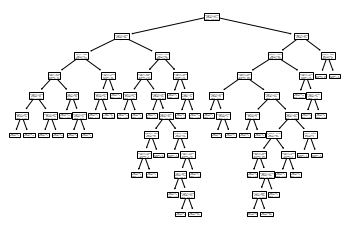

In [19]:
# Create tree with this
!pip3 install graphviz
import graphviz
tree.plot_tree(clf)
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("diff_expr")

In [91]:
import tensorflow as tf

model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(512, activation='relu', input_shape=(X.shape[1],)),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Create model + compile
model.summary()
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy", "mse"])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 512)               2514944   
                                                                 
 dense_12 (Dense)            (None, 1)                 513       
                                                                 
Total params: 2,515,457
Trainable params: 2,515,457
Non-trainable params: 0
_________________________________________________________________


In [96]:
X_save = X[Y]
print(len(list(filter(lambda x: x, Y))) / len(Y))

model.fit(X, np.zeros(len(X_save)), epochs=10)

0.28828058169375537
Epoch 1/10
37/37 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - mse: 0.0000e+00
Epoch 2/10
37/37 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - mse: 0.0000e+00
Epoch 3/10
37/37 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - mse: 0.0000e+00
Epoch 4/10
37/37 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - mse: 0.0000e+00
Epoch 5/10
37/37 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - mse: 0.0000e+00
Epoch 6/10
37/37 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - mse: 0.0000e+00
Epoch 7/10
37/37 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - mse: 0.0000e+00
Epoch 8/10
37/37 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - mse: 0.0000e+00
Epoch 9/10
37/37 [==

In [89]:
print("\n".join([str(i) for i in model.predict(X)]))

[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
